In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

CONFIRMED_URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/10-28-2020.csv'
df = pd.read_csv(CONFIRMED_URL)
df.head()

#print(df)

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2020-10-29 04:24:49,33.93911,67.709953,41145,1529.0,34237,5379.0,Afghanistan,105.694204,3.716126
1,NaN,NaN,NaN,Albania,2020-10-29 04:24:49,41.15330,20.168300,20040,493.0,10893,8654.0,Albania,696.365279,2.460080
2,NaN,NaN,NaN,Algeria,2020-10-29 04:24:49,28.03390,1.659600,57026,1941.0,39635,15450.0,Algeria,130.044797,3.403711
3,NaN,NaN,NaN,Andorra,2020-10-29 04:24:49,42.50630,1.521800,4517,72.0,3144,1301.0,Andorra,5846.114023,1.593978
4,NaN,NaN,NaN,Angola,2020-10-29 04:24:49,-11.20270,17.873900,10074,275.0,3693,6106.0,Angola,30.651487,2.729799


In [ ]:
col_list = ["Country_Region","Confirmed","Deaths","Recovered","Active","Incidence_Rate", "Case-Fatality_Ratio"]
print(df[col_list])

          Country_Region  Confirmed  ...  Incidence_Rate  Case-Fatality_Ratio
0            Afghanistan      41145  ...      105.694204             3.716126
1                Albania      20040  ...      696.365279             2.460080
2                Algeria      57026  ...      130.044797             3.403711
3                Andorra       4517  ...     5846.114023             1.593978
4                 Angola      10074  ...       30.651487             2.729799
...                  ...        ...  ...             ...                  ...
3954  West Bank and Gaza      51948  ...     1018.305506             0.895126
3955      Western Sahara         10  ...        1.674116            10.000000
3956               Yemen       2061  ...        6.910086            29.063561
3957              Zambia      16285  ...       88.582675             2.136936
3958            Zimbabwe       8320  ...       55.978207             2.908654

[3959 rows x 7 columns]


         Date  Confirmed
0     1/25/20          0
1     1/26/20          0
2     1/27/20          1
3     1/28/20          1
4     1/29/20          1
..        ...        ...
277  10/28/20       9205
278  10/29/20       9791
279  10/30/20      10424
280  10/31/20      10663
281   11/1/20      11060

[282 rows x 2 columns]


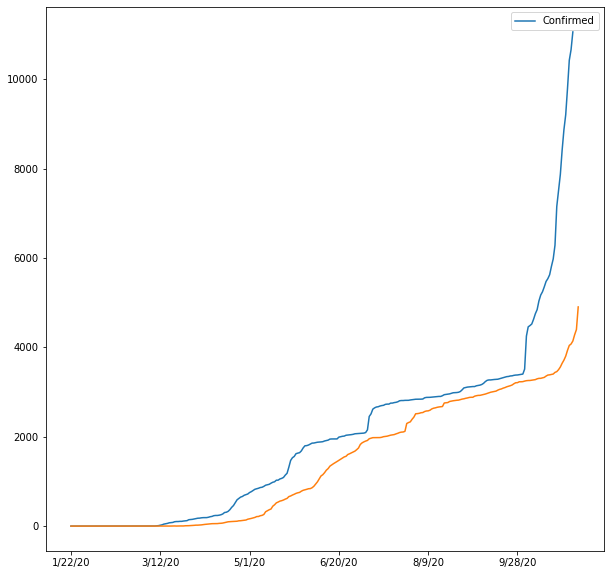

In [ ]:
class Corona:


    def __init__(self):

        BASE_URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series'

        self.URLS = {'confirmed': f'{BASE_URL}/time_series_covid19_confirmed_global.csv',
                'deaths': f'{BASE_URL}/time_series_covid19_deaths_global.csv',
                'recovered':f'{BASE_URL}/time_series_covid19_recovered_global.csv', 
        }


        self.data = {case:pd.read_csv(url) for case, url in self.URLS.items()}
    def current_status(self):
        pass 

corona = Corona()

confirmed_df = corona.data['confirmed']
confirmed_df.to_csv('confirmed.csv', index=False)
#col_list1_item = confirmed_df.next()
#col_list1 = list(col_list1_item)
#print(col_list1_item)
#print(confirmed_df.iloc[:,1:])
confirmed_df.drop(["Lat","Long"],axis = 1)
confirmed_df_new = (confirmed_df.drop(["Lat","Long","Country/Region"],axis = 1)).iloc[:,4:]
confirmed_df_LK = confirmed_df_new.iloc[229]
#print(type(confirmed_df_LK))
confirmed_df_LK = pd.DataFrame(confirmed_df_LK).reset_index()
confirmed_df_LK.columns = ['Date', 'Confirmed']
print(confirmed_df_LK)
#confirmed_df_LK = confirmed_df_LK.astype(float)

deaths_df = corona.data['deaths']
deaths_df.to_csv('deaths.csv', index=False)
#col_list1_item = confirmed_df.next()
#col_list1 = list(col_list1_item)
#print(col_list1_item)
#print(confirmed_df.iloc[:,1:])
#confirmed_df.drop(["Lat","Long"],axis = 1)
deaths_df_new = (deaths_df.drop(["Lat","Long","Country/Region"],axis = 1)).iloc[:,1:]
deaths_df_LK = deaths_df_new.iloc[229]
#print(deaths_df_LK)
deaths_df_LK = deaths_df_LK.astype(float)

recovered_df = corona.data['recovered']
recovered_df.to_csv('recovered.csv', index=False)
#col_list1_item = confirmed_df.next()
#col_list1 = list(col_list1_item)
#print(col_list1_item)
#print(confirmed_df.iloc[:,1:])
#confirmed_df.drop(["Lat","Long"],axis = 1)
recovered_df_new = (recovered_df.drop(["Lat","Long","Country/Region"],axis = 1)).iloc[:,1:]
recovered_df_LK = recovered_df_new.iloc[216]
#print(recovered_df_LK)
recovered_df_LK = recovered_df_LK.astype(float)

confirmed_df_LK.plot(figsize=(10,10))
recovered_df_LK.plot(figsize=(10,10))
#deaths_df_LK.plot(figsize=(20,20),y="10/30/20")
plt.show()
#print(corona.data.keys())
#print(corona.data)


In [ ]:
df = pd.DataFrame(confirmed_df_LK)

In [ ]:
def input_serving_fn(dataframe):
  data = []
  for i in range(2, dataframe.shape[0]):
    data.append((dataframe.iloc[i][1]-dataframe.iloc[i-2][1])/(2*dataframe.iloc[i][1]))
  return data ;

In [ ]:
lambda_ti = input_serving_fn(df)


In [ ]:
dfx = df.copy()
rates = lambda_ti.copy()
rates.insert(0, 0)
rates.insert(0, 0)
dfx['growth rate'] = rates
rates

[0,
 0,
 0.5,
 0.5,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.25,
 0.25,
 0.3333333333333333,
 0.4,
 0.3333333333333333,
 0.32142857142857145,
 0.29545454545454547,
 0.22549019607843138,
 0.13333333333333333,
 0.1506849315068493,
 0.11038961038961038,
 0.054878048780487805,
 0.10309278350515463,
 0.09803921568627451,
 0.024509803921568627,
 0.018867924528301886,
 0.018867924528301886,
 0.030973451327433628,
 0.04700854700854701,
 0.036885245901639344,
 0.09090909090909091,
 0.0821917808219178,
 0.026490066225165563,
 0.040880503144654086,
 0.045180722891566265,
 0.048295454545454544,
 0.033707865168539325,
 0.024324324324324326,
 0.0291005291005291,
 0.013157894736842105,
 0.002631578947368421,
 0.020202020202020204,
 0.047619047619047616,
 0.04377880184331797,
 0.049356223175

In [ ]:
dfy = dfx.drop('Date', 1)
dfy.reset_index(drop= True)



,Confirmed,growth rate
0,0,0.000000
1,0,0.000000
2,1,0.500000
3,1,0.500000
4,1,0.000000
...,...,...
277,9205,0.043020
278,9791,0.047033
279,10424,0.058471
280,10663,0.040889


***

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


# Make numpy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

print(tf.__version__)

2.3.0


282

In [ ]:
df['input']=range(len(df))

In [ ]:
train_dataset = df.sample(frac=0.9, random_state=0)
test_dataset = df.drop(train_dataset.index)

In [ ]:
train_features = train_dataset['input']
test_features =test_dataset['input']
train_labels = train_dataset['Confirmed']
test_labels = test_dataset.pop('Confirmed')

In [ ]:
normalizer = preprocessing.Normalization()

In [ ]:
normalizer.adapt(np.array(train_features))

In [ ]:
print(normalizer.mean.numpy())

[139.618]


In [ ]:
confirmed = np.array(train_features)

confirmed_normalizer = preprocessing.Normalization(input_shape=[1,])
confirmed_normalizer.adapt(confirmed)

In [ ]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(32, activation='relu'),
      layers.Dense(4, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_squared_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [ ]:
model = build_and_compile_model(confirmed_normalizer)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_5 (Normalizati (None, 1)                 3         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                64        
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 132       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 5         
Total params: 204
Trainable params: 201
Non-trainable params: 3
_________________________________________________________________


In [ ]:
history =model.fit(
    train_features, train_labels,
    validation_split=0.2,
    verbose=2, epochs=1000)

Epoch 1/1000
7/7 - 0s - loss: 8551812.0000 - val_loss: 6505497.0000
Epoch 2/1000
7/7 - 0s - loss: 8551456.0000 - val_loss: 6505238.5000
Epoch 3/1000
7/7 - 0s - loss: 8551222.0000 - val_loss: 6505114.5000
Epoch 4/1000
7/7 - 0s - loss: 8551102.0000 - val_loss: 6505055.5000
Epoch 5/1000
7/7 - 0s - loss: 8551032.0000 - val_loss: 6504993.5000
Epoch 6/1000
7/7 - 0s - loss: 8550960.0000 - val_loss: 6504922.5000
Epoch 7/1000
7/7 - 0s - loss: 8550875.0000 - val_loss: 6504847.0000
Epoch 8/1000
7/7 - 0s - loss: 8550785.0000 - val_loss: 6504764.0000
Epoch 9/1000
7/7 - 0s - loss: 8550684.0000 - val_loss: 6504674.0000
Epoch 10/1000
7/7 - 0s - loss: 8550587.0000 - val_loss: 6504575.5000
Epoch 11/1000
7/7 - 0s - loss: 8550466.0000 - val_loss: 6504474.5000
Epoch 12/1000
7/7 - 0s - loss: 8550344.0000 - val_loss: 6504359.0000
Epoch 13/1000
7/7 - 0s - loss: 8550213.0000 - val_loss: 6504234.5000
Epoch 14/1000
7/7 - 0s - loss: 8550072.0000 - val_loss: 6504103.0000
Epoch 15/1000
7/7 - 0s - loss: 8549907.0000

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
995,874904.5000,426836.03125,995
996,875207.2500,427103.37500,996
997,875492.5000,426513.03125,997
998,874978.1875,426491.21875,998
999,875135.5000,425736.50000,999


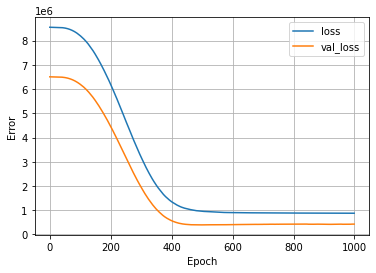

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  #plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

plot_loss(history)

In [ ]:
test_results = {}

test_results['dnn_model'] = model.evaluate(
   test_dataset['input'],
    test_labels, verbose=1)

1/1 [==============================] - 0s 1ms/step - loss: 360609.8438


In [ ]:
test_results

{'dnn_model': 360609.84375}